<a href="https://colab.research.google.com/github/STYLO009/machine_learning/blob/main/Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('disease.csv')

In [23]:
df.shape

(9493, 378)

In [24]:
df.head(5)

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9493 entries, 0 to 9492
Columns: 378 entries, diseases to neck weakness
dtypes: float64(335), int64(42), object(1)
memory usage: 27.4+ MB


,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
count,9493.000000,9493.000000,9493.000000,9493.000000,9493.000000,9493.000000,9493.000000,9493.000000,9493.000000,9493.000000,...,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0,9492.0
mean,0.074371,0.078268,0.095860,0.147477,0.038660,0.147898,0.085326,0.049405,0.057200,0.056041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.262387,0.268607,0.294415,0.354600,0.192794,0.355018,0.279381,0.216723,0.232237,0.230014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df.value_counts()

diseases                 anxiety and nervousness  depression  shortness of breath  depressive or psychotic symptoms  sharp chest pain  dizziness  insomnia  abnormal involuntary movements  chest tightness  palpitations  irregular heartbeat  breathing fast  hoarse voice  sore throat  difficulty speaking  cough  nasal congestion  throat swelling  diminished hearing  lump in throat  throat feels tight  difficulty in swallowing  skin swelling  retention of urine  groin mass  leg pain  hip pain  suprapubic pain  blood in stool  lack of growth  emotional symptoms  elbow weakness  back weakness  pus in sputum  symptoms of the scrotum and testes  swelling of scrotum  pain in testicles  flatulence  pus draining from ear  jaundice  mass in scrotum  white discharge from eye  irritable infant  abusing alcohol  fainting  hostile behavior  drug abuse  sharp abdominal pain  feeling ill  vomiting  headache  nausea  diarrhea  vaginal itching  vaginal dryness  painful urination  involuntary urination  pain during intercourse  frequent urination  lower abdominal pain  vaginal discharge  blood in urine  hot flashes  intermenstrual bleeding  hand or finger pain  wrist pain  hand or finger swelling  arm pain  wrist swelling  arm stiffness or tightness  arm swelling  hand or finger stiffness or tightness  wrist stiffness or tightness  lip swelling  toothache  abnormal appearing skin  skin lesion  acne or pimples  dry lips  facial pain  mouth ulcer  skin growth  eye deviation  diminished vision  double vision  cross-eyed  symptoms of eye  pain in eye  eye moves abnormally  abnormal movement of eyelid  foreign body sensation in eye  irregular appearing scalp  swollen lymph nodes  back pain  neck pain  low back pain  pain of the anus  pain during pregnancy  pelvic pain  impotence  infant spitting up  vomiting blood  regurgitation  burning abdominal pain  restlessness  symptoms of infants  wheezing  peripheral edema  neck mass  ear pain  jaw swelling  mouth dryness  neck swelling  knee pain  foot or toe pain  bowlegged or knock-kneed  ankle pain  bones are painful  knee weakness  elbow pain  knee swelling  skin moles  knee lump or mass  weight gain  problems with movement  knee stiffness or tightness  leg swelling  foot or toe swelling  heartburn  smoking problems  muscle pain  infant feeding problem  recent weight loss  problems with shape or size of breast  underweight  difficulty eating  scanty menstrual flow  vaginal pain  vaginal redness  vulvar irritation  weakness  decreased heart rate  increased heart rate  bleeding or discharge from nipple  ringing in ear  plugged feeling in ear  itchy ear(s)  frontal headache  fluid in ear  neck stiffness or tightness  spots or clouds in vision  eye redness  lacrimation  itchiness of eye  blindness  eye burns or stings  itchy eyelid  feeling cold  decreased appetite  excessive appetite  excessive anger  loss of sensation  focal weakness  slurring words  symptoms of the face  disturbance of memory  paresthesia  side pain  fever  shoulder pain  shoulder stiffness or tightness  shoulder weakness  arm cramps or spasms  shoulder swelling  tongue lesions  leg cramps or spasms  abnormal appearing tongue  ache all over  lower body pain  problems during pregnancy  spotting or bleeding during pregnancy  cramps and spasms  upper abdominal pain  stomach bloating  changes in stool appearance  unusual color or odor to urine  kidney mass  swollen abdomen  symptoms of prostate  leg stiffness or tightness  difficulty breathing  rib pain  joint pain  muscle stiffness or tightness  pallor  hand or finger lump or mass  chills  groin pain  fatigue  abdominal distention  regurgitation.1  symptoms of the kidneys  melena  flushing  coughing up sputum  seizures  delusions or hallucinations  shoulder cramps or spasms  joint stiffness or tightness  pain or soreness of breast  excessive urination at night  bleeding from eye  rectal bleeding  constipation  temper problems  coryza  wrist weakness  eye strain  hemoptysis  lymphedema  skin on

In [27]:
print(df.dtypes)

diseases                             object
anxiety and nervousness               int64
depression                            int64
shortness of breath                   int64
depressive or psychotic symptoms      int64
                                     ...   
hip weakness                        float64
back swelling                       float64
ankle stiffness or tightness        float64
ankle weakness                      float64
neck weakness                       float64
Length: 378, dtype: object


In [28]:
df.isnull().sum()

,0
diseases,0
anxiety and nervousness,0
depression,0
shortness of breath,0
depressive or psychotic symptoms,0
...,...
hip weakness,1
back swelling,1
ankle stiffness or tightness,1
ankle weakness,1


In [29]:
df.duplicated().sum()

np.int64(2710)

In [30]:
df_cleaned = df.copy()
df_cleaned.fillna(0,inplace=True)
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)

In [31]:
df_cleaned.columns

Index(['diseases', 'anxiety and nervousness', 'depression',
       'shortness of breath', 'depressive or psychotic symptoms',
       'sharp chest pain', 'dizziness', 'insomnia',
       'abnormal involuntary movements', 'chest tightness',
       ...
       'stuttering or stammering', 'problems with orgasm', 'nose deformity',
       'lump over jaw', 'sore in nose', 'hip weakness', 'back swelling',
       'ankle stiffness or tightness', 'ankle weakness', 'neck weakness'],
      dtype='object', length=378)

In [32]:
from sklearn.preprocessing import OneHotEncoder

encode = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
df_encode = encode.fit_transform(df_cleaned[['diseases']])

df_encode = pd.DataFrame(df_encode, columns=encode.get_feature_names_out(['diseases']))

In [33]:
df_encode

,diseases_atelectasis,diseases_atrophic vaginitis,diseases_cellulitis or abscess of mouth,diseases_choledocholithiasis,diseases_chronic pain disorder,diseases_cirrhosis,diseases_cryptorchidism,diseases_diabetic retinopathy,diseases_eating disorder,diseases_eye alignment disorder,...,diseases_rotator cuff injury,diseases_salivary gland disorder,diseases_sick sinus syndrome,diseases_subdural hemorrhage,diseases_thoracic aortic aneurysm,diseases_tinnitus of unknown cause,diseases_transient ischemic attack,diseases_turner syndrome,diseases_vaginitis,diseases_vocal cord polyp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


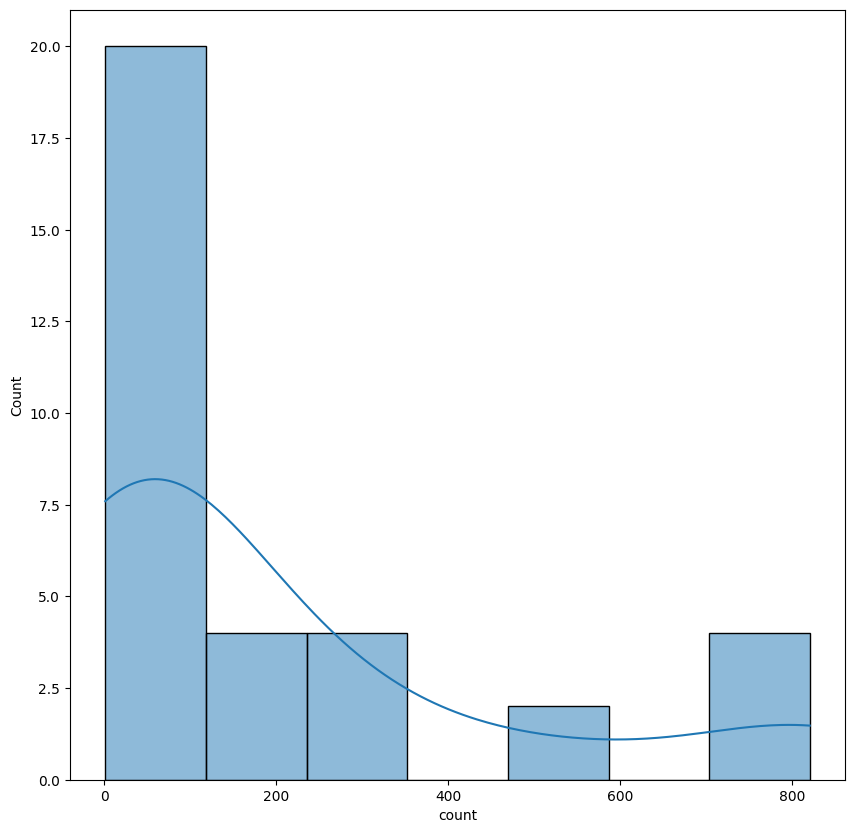

In [34]:
plt.figure(figsize=(10,10))
sns.histplot(df_cleaned['diseases'].value_counts(),kde=True)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df_cleaned.drop('diseases',axis=1)

for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)

y = df_cleaned['diseases']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2,random_state=42)

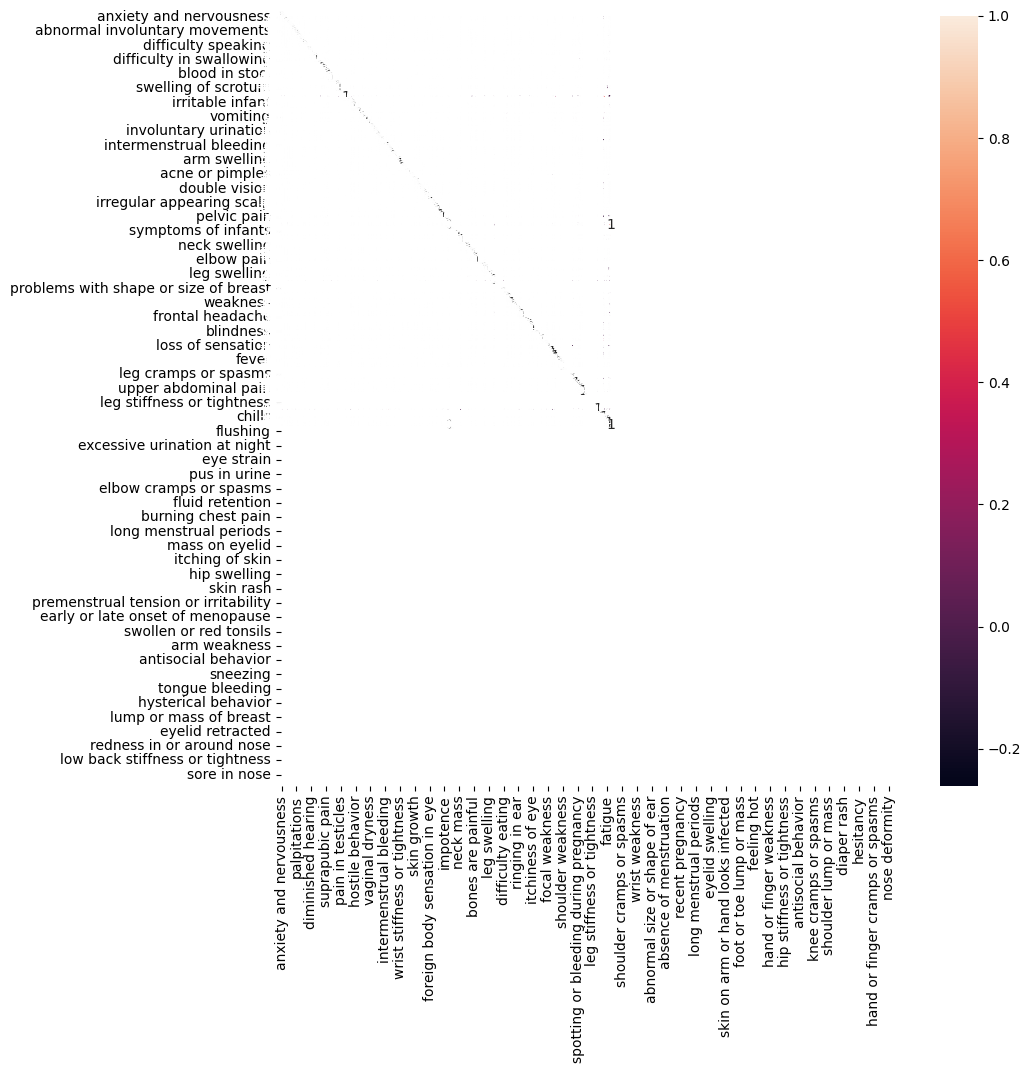

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cleaned.drop('diseases', axis=1).corr(),annot=True) # Exclude 'diseases' column
plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(),
    "Naive Bayes Classifier": GaussianNB(),
    "XGBoost Classifier": XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Accuracy Score: {accuracy:.3f}")
    print("-" * 20)

Logistic Regression:
  Accuracy Score: 0.982
--------------------
Random Forest Classifier:
  Accuracy Score: 0.978
--------------------
Naive Bayes Classifier:
  Accuracy Score: 0.987
--------------------
XGBoost Classifier:
  Accuracy Score: 0.978
--------------------


In [37]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [38]:
per = Perceptron(max_iter=1000, random_state=42)
per.fit(X_train, y_train)
y_pred = per.predict(X_test)

print("Predictions:", y_pred)
print("Accuracy:", per.score(X_test, y_test))

Predictions: [ 8 17 21 ...  9 21 11]
Accuracy: 0.9801031687546058


In [39]:
num_classes = len(label_encoder.classes_)
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

In [40]:
tf.keras.backend.clear_session()
model_dl = Sequential([
    Dense(16,input_dim=X_train.shape[1],activation='relu'),
    Dense(8,activation='leaky_relu'),
    Dense(num_classes,activation='softmax')
])

In [41]:
model_dl.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [42]:
history = model_dl.fit(X_train,y_train_cat,epochs=100,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0805 - loss: 3.2774 - val_accuracy: 0.4678 - val_loss: 2.0539
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5239 - loss: 1.7706 - val_accuracy: 0.7505 - val_loss: 1.0410
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7683 - loss: 0.9689 - val_accuracy: 0.8720 - val_loss: 0.6052
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8771 - loss: 0.5886 - val_accuracy: 0.9107 - val_loss: 0.4126
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8995 - loss: 0.4297 - val_accuracy: 0.9328 - val_loss: 0.3045
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9335 - loss: 0.2987 - val_accuracy: 0.9549 - val_loss: 0.2367
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9439 - loss: 0.2582 - val_accuracy: 0.9687 - val_loss: 0.1914
Epoch 8/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9555 - loss: 0.2021 - val_accu

In [46]:
loss,accuracy = model_dl.evaluate(X_test,y_test_cat,verbose=1)
print("Accuracy","-"*20,'>',accuracy)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9761 - loss: 0.0926
Accuracy -------------------- > 0.9808400869369507


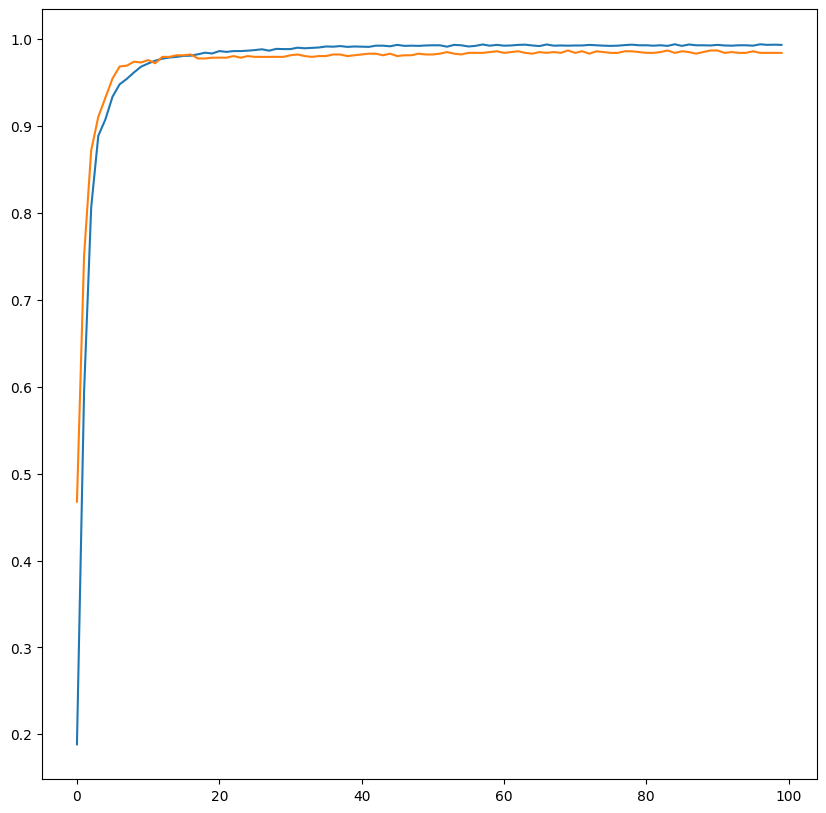

In [44]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'],label='train Acc')
plt.plot(history.history['val_accuracy'],label='val Acc')